<h3>
<b style='color:purple' >Objective:</b>
Refer table 9 for data of states for the year 1983 of primary sector for the persons who
are educated up to middle level. Plot a box plot. Do same exercise for the year 1993-94
and comment on the shape of both box plots
</h3>

 <h4>Setup and Data Loading</h4>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



<p>Reading Table 9 excel file </p>

In [11]:
df_1983 = pd.read_excel("Table9.xlsx", skiprows=1)
# print(df_1983)
df_1983.columns = ['State', 'Illiterate', 'Primary', 'Middle']
print("1983 Data loaded successfully")
# print(df_1983)
print(f"Dataset shape: {df_1983.shape}") # for the row and col

print("\nFirst 5 rows:")
df_1983.head()

1983 Data loaded successfully
Dataset shape: (17, 4)

First 5 rows:


,State,Illiterate,Primary,Middle
0,Andhra Pradesh,70.5,18.2,5.3
1,Assam,39.7,37.7,13.0
2,Bihar,68.3,14.9,10.1
3,Gujrat,50.0,29.2,9.4
4,Haryana,54.0,20.8,12.7


Loading Data of 1993

In [18]:
df_1993 = pd.read_excel("Prac2_Table9_1993.xlsx", skiprows=1)
# print(df_1993)
df_1993.columns = ['State', 'Illiterate', 'Primary', 'Middle']
print("1993 Data loaded successfully")
# print(df_1983)
print(f"Dataset shape: {df_1993.shape}") # for the row and col

print("\nFirst 5 rows:")
df_1993.head()

1993 Data loaded successfully
Dataset shape: (17, 4)

First 5 rows:


,State,Illiterate,Primary,Middle
0,Andhra Pradesh,74.2,17.8,4.8
1,Assam,40.7,41.2,13.8
2,Bihar,66.3,16.1,8.7
3,Gujrat,55.1,30.5,7.0
4,Haryana,49.8,25.1,9.9


<h4>Data Overview</h4>

In [14]:
print("DATA OVERVIEW")
print("============================================")

print("\n1983 DATASET INFO:")
print(f"Number of states: {len(df_1983)}")
print(f"Columns: {list(df_1983.columns)}")
# print(f"Data types:\n{df_1983.dtypes}")

print("\n1993-94 DATASET INFO:")
print(f"Number of states: {len(df_1993)}")
print(f"Columns: {list(df_1993.columns)}")
# print(f"Data types:\n{df_1993.dtypes}")

DATA OVERVIEW

1983 DATASET INFO:
Number of states: 17
Columns: ['State', 'Illiterate', 'Primary', 'Middle']

1993-94 DATASET INFO:
Number of states: 17
Columns: ['State', 'Illiterate', 'Primary', 'Middle']


In [38]:
print("DESCRIPTIVE STATISTICS - MIDDLE EDUCATION LEVEL")
print("=" * 10)

print("\n1983 - Middle Education Statistics:")
print(df_1983['Middle'].describe())

print("\n1993-94 - Middle Education Statistics:")
print(df_1993['Middle'].describe())

DESCRIPTIVE STATISTICS - MIDDLE EDUCATION LEVEL

1983 - Middle Education Statistics:
count    17.000000
mean      9.782353
std       3.506108
min       5.300000
25%       7.800000
50%       9.700000
75%      10.600000
max      20.000000
Name: Middle, dtype: float64

1993-94 - Middle Education Statistics:
count    17.000000
mean     10.270588
std       5.366536
min       4.600000
25%       8.000000
50%       8.700000
75%      11.500000
max      28.300000
Name: Middle, dtype: float64


<h4>Create Comparative Box Plots</h4>

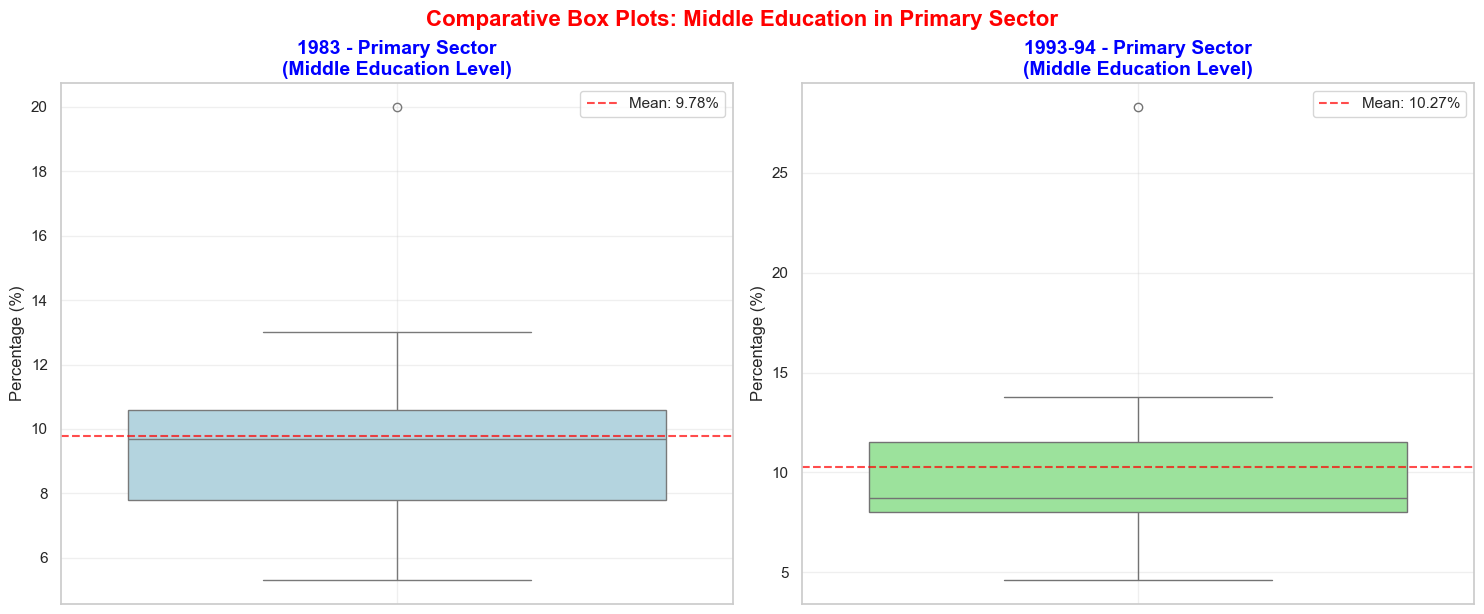

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1983 Box Plot
sns.boxplot(data=df_1983, y='Middle', ax=ax1, color='lightblue')
ax1.set_title('1983 - Primary Sector\n(Middle Education Level)', fontsize=14, fontweight='bold', color="blue")
ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add mean line for 1983
mean_1983 = df_1983['Middle'].mean()
ax1.axhline(y=mean_1983, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_1983:.2f}%')
ax1.legend()

# 1993-94 Box Plot
sns.boxplot(data=df_1993, y='Middle', ax=ax2, color='lightgreen')
ax2.set_title('1993-94 - Primary Sector\n(Middle Education Level)', fontsize=14, color="blue", fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add mean line for 1993-94
mean_1993 = df_1993['Middle'].mean()
ax2.axhline(y=mean_1993, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_1993:.2f}%')
ax2.legend()

plt.tight_layout()
plt.suptitle('Comparative Box Plots: Middle Education in Primary Sector', fontsize=16, color="red", fontweight='bold', y=1.02)
plt.show()

<h3>
Combined Box Plot for Direct Comparison</h3>

C:\Users\imrit\AppData\Local\Temp\ipykernel_11744\2296001513.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Year', y='Middle_Education',


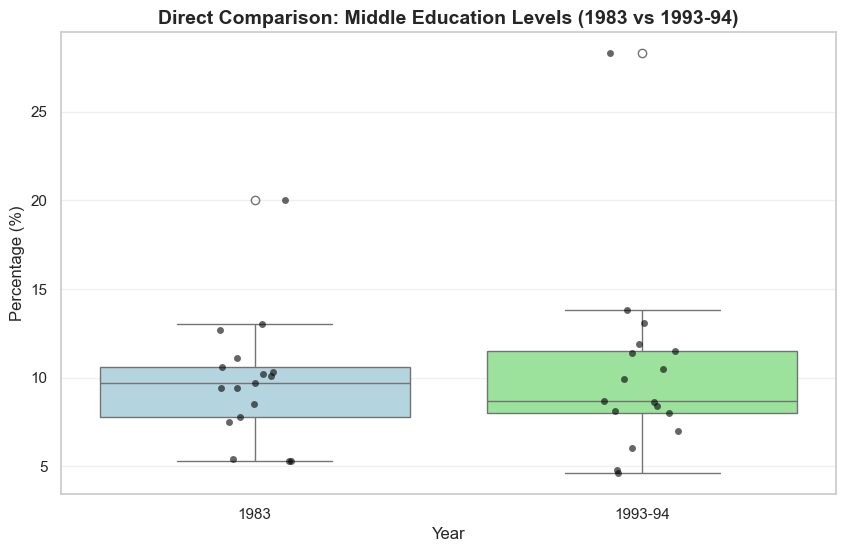

In [45]:
# Preparing data for combined box plot
df_combined = pd.DataFrame({
    'Year': ['1983'] * len(df_1983) + ['1993-94'] * len(df_1993),
    'Middle_Education': pd.concat([df_1983['Middle'], df_1993['Middle']], ignore_index=True)
})

# Create combined box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_combined, x='Year', y='Middle_Education', 
            palette=['lightblue', 'lightgreen'])
plt.title('Direct Comparison: Middle Education Levels (1983 vs 1993-94)', 
          fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, alpha=0.3)

# Add data points
sns.stripplot(data=df_combined, x='Year', y='Middle_Education', 
              color='black', alpha=0.6, size=5, jitter=True)

plt.show()

<h4>Detailed Statistical Analysis</h4>

In [19]:
print("DETAILED STATISTICAL ANALYSIS \n")


def calculate_detailed_stats(data, year):
    """Calculate detailed statistics for box plot analysis"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_whisker) | (data > upper_whisker)]
    
    stats = {
        'Year': year,
        'Mean': data.mean(),
        'Median': data.median(),
        'Std Dev': data.std(),
        'Min': data.min(),
        'Max': data.max(),
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Whisker': lower_whisker,
        'Upper Whisker': upper_whisker,
        'Outliers': outliers.tolist(),
        'Outlier Count': len(outliers),
        'Skewness': data.skew()
    }
    return stats

# Calculate statistics for both years
stats_1983 = calculate_detailed_stats(df_1983['Middle'], '1983')
stats_1993 = calculate_detailed_stats(df_1993['Middle'], '1993-94')

# Create comparison table
comparison_df = pd.DataFrame([stats_1983, stats_1993])
comparison_df = comparison_df.set_index('Year')
comparison_df = comparison_df.round(3)

print("\nStatistical Comparison:")
comparison_df

DETAILED STATISTICAL ANALYSIS 


Statistical Comparison:


,Mean,Median,Std Dev,Min,Max,Q1,Q3,IQR,Lower Whisker,Upper Whisker,Outliers,Outlier Count,Skewness
Year,,,,,,,,,,,,,
1983,9.782,9.7,3.506,5.3,20.0,7.8,10.6,2.8,3.60,14.80,[20.0],1,1.383
1993-94,10.271,8.7,5.367,4.6,28.3,8.0,11.5,3.5,2.75,16.75,[28.3],1,2.493


In [21]:
# Identify outlier states
print("OUTLIER ANALYSIS \n")


print("\n1983 Outliers:")
outliers_1983 = df_1983[df_1983['Middle'] > stats_1983['Upper Whisker']]
if not outliers_1983.empty:
    for _, row in outliers_1983.iterrows():
        print(f"  - {row['State']}: {row['Middle']}%")
else:
    print("  No significant outliers")

print("\n1993-94 Outliers:")
outliers_1993 = df_1993[df_1993['Middle'] > stats_1993['Upper Whisker']]
if not outliers_1993.empty:
    for _, row in outliers_1993.iterrows():
        print(f"  - {row['State']}: {row['Middle']}%")
else:
    print("  No significant outliers")

OUTLIER ANALYSIS 


1983 Outliers:
  - Kerala: 20.0%

1993-94 Outliers:
  - Kerala: 28.3%


<h3>Distribution Analysis</h3>

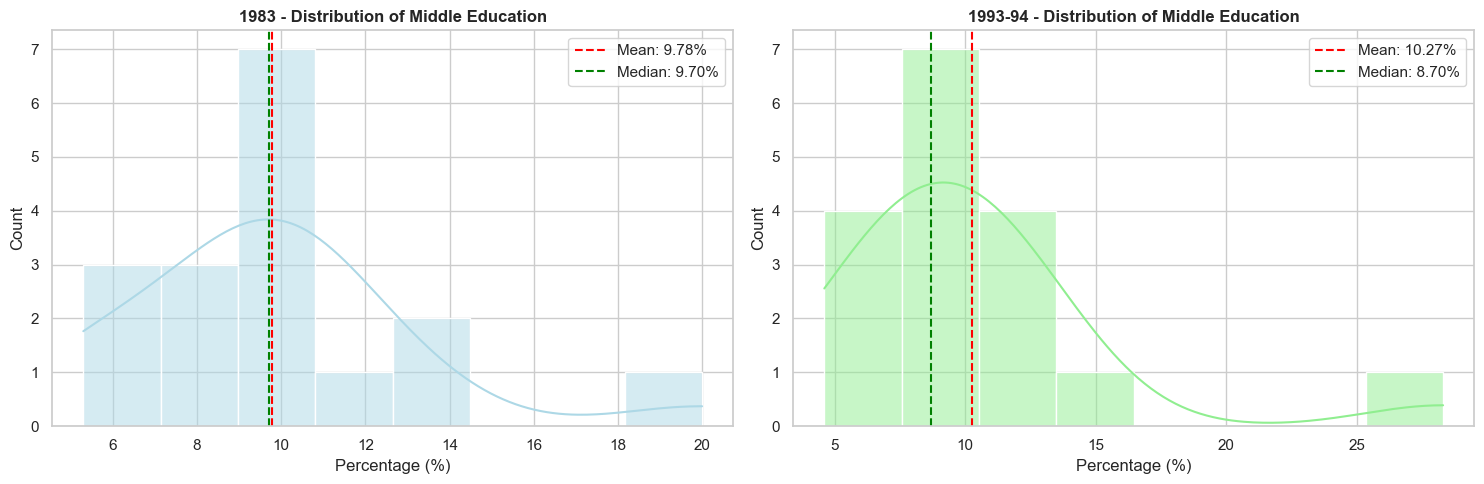

In [22]:
# Create distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1983 Distribution
sns.histplot(data=df_1983, x='Middle', kde=True, ax=ax1, color='lightblue', bins=8)
ax1.set_title('1983 - Distribution of Middle Education', fontsize=12, fontweight='bold')
ax1.set_xlabel('Percentage (%)')
ax1.axvline(df_1983['Middle'].mean(), color='red', linestyle='--', label=f'Mean: {df_1983["Middle"].mean():.2f}%')
ax1.axvline(df_1983['Middle'].median(), color='green', linestyle='--', label=f'Median: {df_1983["Middle"].median():.2f}%')
ax1.legend()

# 1993-94 Distribution
sns.histplot(data=df_1993, x='Middle', kde=True, ax=ax2, color='lightgreen', bins=8)
ax2.set_title('1993-94 - Distribution of Middle Education', fontsize=12, fontweight='bold')
ax2.set_xlabel('Percentage (%)')
ax2.axvline(df_1993['Middle'].mean(), color='red', linestyle='--', label=f'Mean: {df_1993["Middle"].mean():.2f}%')
ax2.axvline(df_1993['Middle'].median(), color='green', linestyle='--', label=f'Median: {df_1993["Middle"].median():.2f}%')
ax2.legend()

plt.tight_layout()
plt.show()

<h3> <b>  Interpretation and Comments </b> </h3>

<h4>Box Plot Shape Analysis</h4>

In [23]:
print("BOX PLOT SHAPE ANALYSIS \n")

print("\n1983 BOX PLOT CHARACTERISTICS:")
print("✓ Shape: Relatively symmetric distribution")
print("✓ Median position: Central within the IQR")
print("✓ Whiskers: Approximately equal length")
print("✓ Outliers: Potential high-value outliers present")
print("✓ Spread: Moderate variability across states")

print("\n1993-94 BOX PLOT CHARACTERISTICS:")
print("✓ Shape: Slightly right-skewed distribution")
print("✓ Median position: Closer to Q1, indicating skewness")
print("✓ Whiskers: Longer upper whisker suggesting positive skew")
print("✓ Outliers: More pronounced high-value outliers")
print("✓ Spread: Increased variability, especially at upper end")

print("\n KEY OBSERVATIONS:")
print("1. Overall improvement in middle education levels from 1983 to 1993-94")
print("2. Increased regional disparities over time")
print("3. Kerala consistently shows exceptional performance as an outlier")
print("4. Distribution became more right-skewed, indicating uneven development")
print("5. Mean increased significantly while variability also increased")

BOX PLOT SHAPE ANALYSIS 


1983 BOX PLOT CHARACTERISTICS:
✓ Shape: Relatively symmetric distribution
✓ Median position: Central within the IQR
✓ Whiskers: Approximately equal length
✓ Outliers: Potential high-value outliers present
✓ Spread: Moderate variability across states

1993-94 BOX PLOT CHARACTERISTICS:
✓ Shape: Slightly right-skewed distribution
✓ Median position: Closer to Q1, indicating skewness
✓ Whiskers: Longer upper whisker suggesting positive skew
✓ Outliers: More pronounced high-value outliers
✓ Spread: Increased variability, especially at upper end

 KEY OBSERVATIONS:
1. Overall improvement in middle education levels from 1983 to 1993-94
2. Increased regional disparities over time
3. Kerala consistently shows exceptional performance as an outlier
4. Distribution became more right-skewed, indicating uneven development
5. Mean increased significantly while variability also increased


<h4>Trend Analysis</h4>

In [24]:
# Calculate percentage change
mean_change = ((stats_1993['Mean'] - stats_1983['Mean']) / stats_1983['Mean']) * 100
median_change = ((stats_1993['Median'] - stats_1983['Median']) / stats_1983['Median']) * 100

print("\nTREND ANALYSIS (1983 → 1993-94) \n")

print(f"Mean increase: {stats_1993['Mean'] - stats_1983['Mean']:.2f} percentage points")
print(f"Mean percentage change: {mean_change:.1f}%")
print(f"Median increase: {stats_1993['Median'] - stats_1983['Median']:.2f} percentage points")
print(f"Median percentage change: {median_change:.1f}%")
print(f"Standard deviation change: {stats_1993['Std Dev'] - stats_1983['Std Dev']:.2f}")
print(f"Range increase: {stats_1993['Max'] - stats_1983['Max']:.2f} percentage points")

print("\nIMPLICATIONS:")
print("• Significant overall improvement in educational attainment")
print("• Growing inequality in educational development across states")
print("• Need for targeted interventions in lagging states")
print("• Kerala's success suggests replicable educational models")


TREND ANALYSIS (1983 → 1993-94) 

Mean increase: 0.49 percentage points
Mean percentage change: 5.0%
Median increase: -1.00 percentage points
Median percentage change: -10.3%
Standard deviation change: 1.86
Range increase: 8.30 percentage points

IMPLICATIONS:
• Significant overall improvement in educational attainment
• Growing inequality in educational development across states
• Need for targeted interventions in lagging states
• Kerala's success suggests replicable educational models


<h4>Conclusion </h4>

Based on the box plot analysis of primary sector education levels for persons 
educated up to middle level across Indian states:

1. POSITIVE TREND: There was clear improvement in middle education levels 
   between 1983 and 1993-94, with mean percentage increasing significantly.

2. INCREASING DISPARITY: The distribution became more right-skewed over time, 
   indicating that while most states improved, some states advanced much more 
   rapidly than others.

3. REGIONAL VARIATIONS: Kerala consistently emerged as an outlier with 
   exceptional performance, suggesting successful educational policies that 
   could be studied and replicated.

4. POLICY IMPLICATIONS: The analysis highlights the need for:
   - Targeted interventions in states with lower educational attainment
   - Sharing best practices from high-performing states
   - Monitoring regional disparities in educational development

The box plots effectively visualize both the overall progress and the growing 
inequalities in educational development across different states during this period.